In [2]:
import pandas as pd

df=pd.read_csv('iris_flower.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.isnull().sum()


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

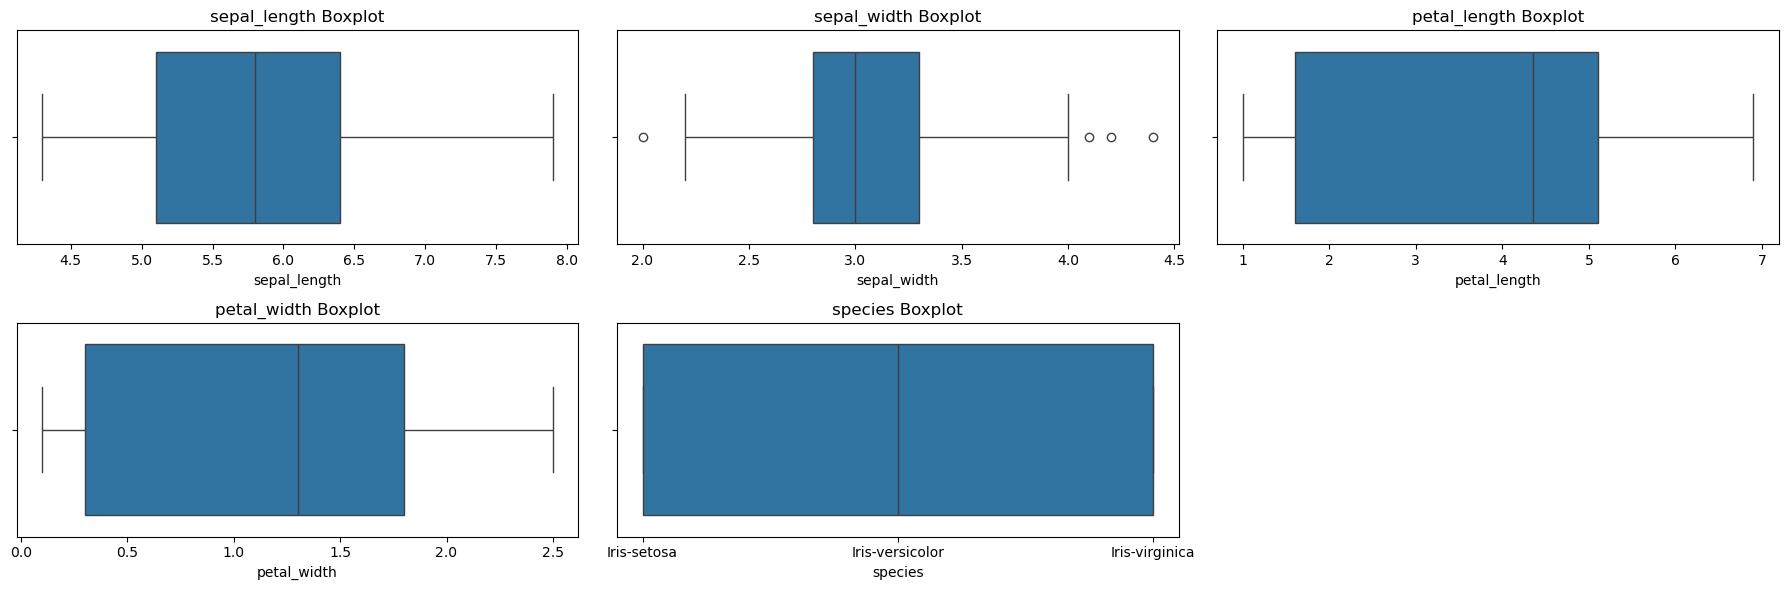

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 6)) 

plt.subplot(2, 3, 1)
sns.boxplot(x=df['sepal_length'])
plt.title("sepal_length Boxplot")

plt.subplot(2, 3, 2)
sns.boxplot(x=df['sepal_width'])
plt.title("sepal_width Boxplot")

plt.subplot(2, 3, 3)
sns.boxplot(x=df['petal_length'])
plt.title("petal_length Boxplot")

plt.subplot(2, 3, 4)
sns.boxplot(x=df['petal_width'])
plt.title("petal_width Boxplot")

plt.subplot(2, 3, 5)
sns.boxplot(x=df['species'])
plt.title("species Boxplot")

plt.tight_layout()
plt.show()


In [29]:
import numpy as np

Q1 = df['sepal_width'].quantile(0.25)
Q3 = df['sepal_width'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#calculating outliers
outliers=df[(df['sepal_width']<lower_bound) | (df['sepal_width']>upper_bound)]

#removing outliers
median=df['sepal_width'].median()
df['sepal_width'] = df['sepal_width'].apply(
    lambda x: median if x < lower_bound else upper_bound if x > upper_bound else x
)

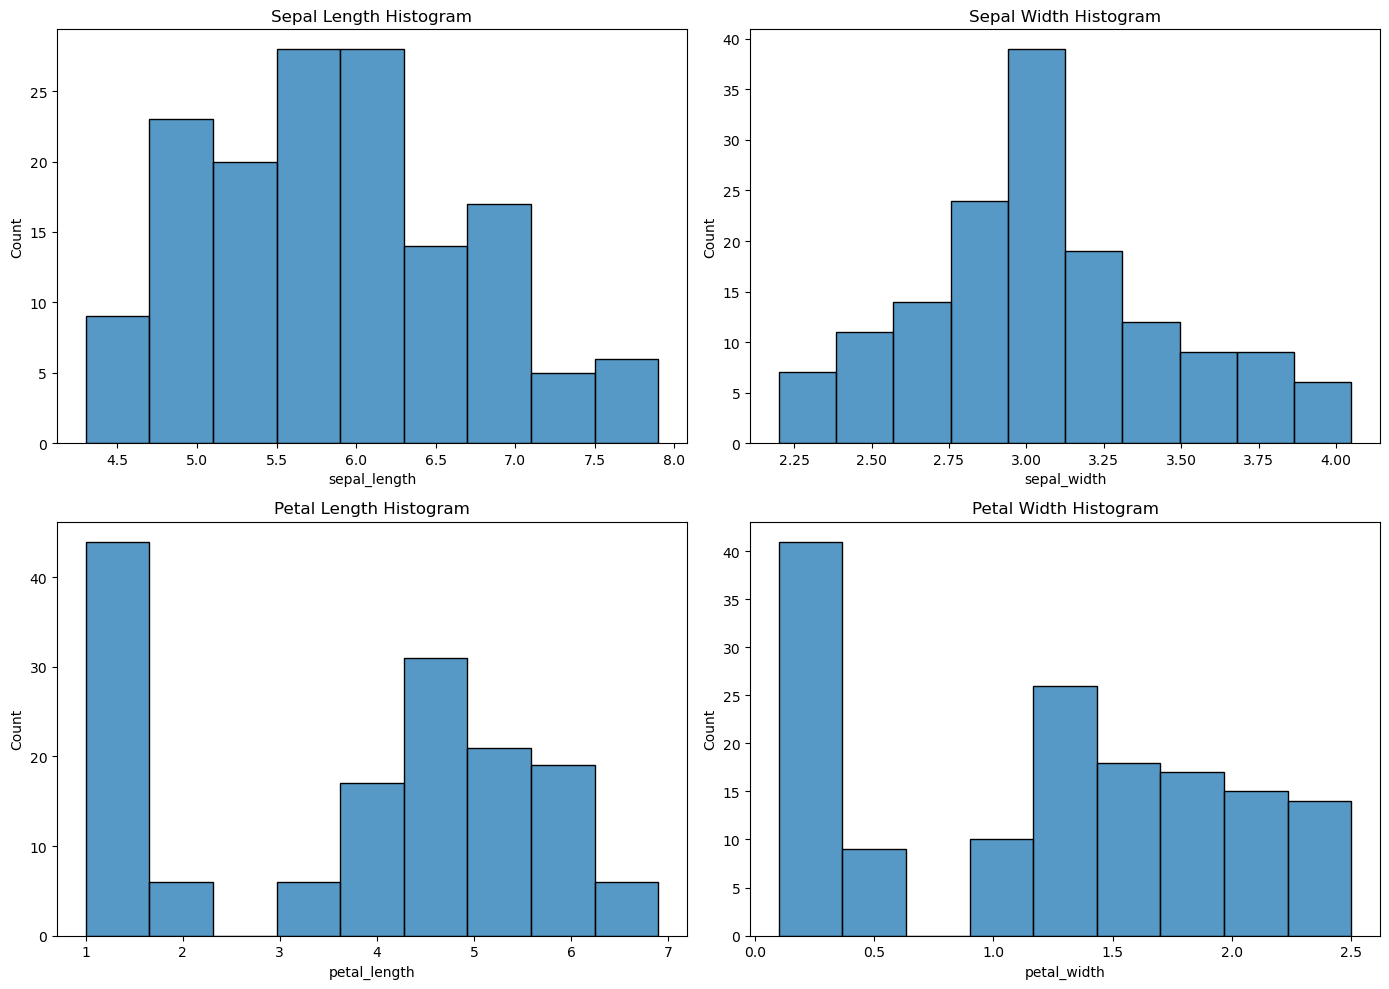

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.histplot(df['sepal_length'])
plt.title("Sepal Length Histogram")

plt.subplot(2, 2, 2)
sns.histplot(df['sepal_width'])
plt.title("Sepal Width Histogram")

plt.subplot(2, 2, 3)
sns.histplot(df['petal_length'])
plt.title("Petal Length Histogram")

plt.subplot(2, 2, 4)
sns.histplot(df['petal_width'])
plt.title("Petal Width Histogram")

plt.tight_layout()
plt.show()


In [43]:
# scalling to remove skewness
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

df_scaled=df.copy()
col_name=['sepal_length','petal_width']

features=df_scaled[col_name]

df_scaled[col_name]=scaler.fit_transform(features.values)
df_scaled

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.222222,3.5,1.4,0.041667,Iris-setosa
1,0.166667,3.0,1.4,0.041667,Iris-setosa
2,0.111111,3.2,1.3,0.041667,Iris-setosa
3,0.083333,3.1,1.5,0.041667,Iris-setosa
4,0.194444,3.6,1.4,0.041667,Iris-setosa
...,...,...,...,...,...
145,0.666667,3.0,5.2,0.916667,Iris-virginica
146,0.555556,2.5,5.0,0.750000,Iris-virginica
147,0.611111,3.0,5.2,0.791667,Iris-virginica
148,0.527778,3.4,5.4,0.916667,Iris-virginica


In [45]:
x=df[['sepal_length','sepal_width','petal_length','petal_width']]
y=df['species']

In [46]:


from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [47]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', random_state=42)

svm_model.fit(X_train, Y_train)

SVC(kernel='linear', random_state=42)

In [53]:
y_pred = svm_model.predict(X_test)

In [54]:
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [55]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
print("Accuracy:", accuracy_score(Y_test, y_pred))

Accuracy: 1.0


In [63]:
print("Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred))


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [62]:
print("Classification Report:")
print(classification_report(Y_test,y_pred))

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [69]:
prediction = svm_model.predict([[4.8, 3.1, 1.2, 0.1]])
print(prediction)

['Iris-setosa']


D:\anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
